## Hello (noteboek geinspireert door Kaggle aangepast door Ferry !!)
Dit notebook en een vliegende start in data-analyse en machinelearning. Plaats dit bestand samen met de CSV file in de map Bootcamp/Dag3.
dan:

$ git add Pima_v23.ipynb diabetes.csv

$ git commit -m "EIGEN BERICHT"

$ git push


## Een AI/Datascience project doorloop altijd de volgende stappen:

1)Feature Selection

2)Model selection

3)Input validation

4)Voorspellen

5)Validatie door confusion

6)Selectie model

5)Gradio webinterface naar diagnostic tool op basis van gekozen model


## Vraag 1

Om een systeem te kunnen bouwen en testen is enige domeinkennis absoluut noodzakelijk, bekijk de volgende vragen en beantwoord ze in de volgende cel.

Beantwoorden in de volgende cel:
- Wat is diabetes?
- Hoe krijg je het?
- Zijn er verschillende soorten?
- Wat zijn de gevolgen?
- Hoe wordt het gediagnostiseerd?
- Hoe wordt het behandeld?

## Tot slot;
ChatGPT/Google/Bing kunnen op alle vragen een antwoordt geven, het gaat niet om het antwoordt het doel is
begrip te krijgen in het domein. Zoek het op vat samen en maak begrippen voor je zelf duidelijk.

#### Cell 2 Ken je domein zodat je de data kan evalueren: max 20 min


###### Hoe krijg je diabetes?
Diabetes kan om verschillende redenen ontstaan. 
Type 1 diabetes ontstaat meestal door genetische factoren en een auto-immuunreactie waarbij het immuunsysteem de insulineproducerende cellen in de alvleesklier aanvalt. 
Type 2 diabetes ontstaat vaak door een combinatie van genetische aanleg en leefstijlfactoren, zoals obesitas, een zittende levensstijl en ongezonde eetgewoonten.

###### Zijn er verschillende soorten?
Ja, er zijn verschillende soorten diabetes, waaronder:

Type 1 diabetes
Type 2 diabetes
Zwangerschapsdiabetes (diabetes die tijdens de zwangerschap optreedt)
Andere specifieke typen diabetes, zoals diabetes als gevolg van genetische afwijkingen, medicatie, of ziekten van de alvleesklier.

###### Wat zijn de gevolgen?
Onbehandelde of slecht gecontroleerde diabetes kan leiden tot ernstige complicaties, waaronder hart- en vaatziekten, nieraandoeningen, neuropathie (zenuwschade), blindheid, en amputaties van ledematen.

###### Hoe wordt het gediagnosticeerd?
Diabetes wordt meestal gediagnosticeerd door het meten van de bloedglucosewaarden. Dit gebeurt vaak met behulp van een nuchtere bloedglucosetest, een orale glucosetolerantietest (OGTT), of een HbA1c-test.

###### Hoe wordt het behandeld?
De behandeling van diabetes kan verschillen afhankelijk van het type diabetes en de individuele omstandigheden. Over het algemeen omvat de behandeling:

Dieet- en leefstijlaanpassingen, zoals gezond eten en regelmatig bewegen.
Medicatie, waaronder orale medicatie of insuline-injecties om de bloedglucosewaarden te reguleren.
Regelmatige monitoring van bloedglucosewaarden en andere gezondheidsparameters.
Het vermijden van risicofactoren voor complicaties, zoals roken en hoge bloeddruk.



## Terug naar de les deel 2.

In [122]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')


In [123]:

diab = pd.read_csv('diabetes.csv')
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [124]:
# Hoeveel records zijn er?
aantal_records = diab.shape[0]
print("Aantal records in de dataset:", aantal_records)


# Is dat genoeg voor een AI oplossing?
# Ja


Aantal records in de dataset: 768


In [125]:
# test 1 Controle op ontbrekende waarden
missing_values = diab.isnull().sum()
if missing_values.sum() == 0:
    print("Geen ontbrekende waarden gevonden.")
else:
    print("Ontbrekende waarden gevonden.")

Geen ontbrekende waarden gevonden.


In [126]:
# test 2 Controle op samenvatting van statistieken
data_summary = diab.describe()

In [127]:
# test 3 Controle op duplicaten
duplicates = diab.duplicated().sum()
if duplicates == 0:
    print("Geen duplicaten gevonden.")
else:
    print("Duplicaten gevonden.")

Geen duplicaten gevonden.


In [128]:
# vervang 0 and NaN waarden.

# Verwijder rijen met NaN-waarden
diab.dropna(inplace=True)



In [129]:
# Annemen dat 'diabetes' de naam is van de kolom die aangeeft of iemand diabetes heeft (1) of niet (0)
aantal_diabetes_gevallen = diab['Outcome'].value_counts()[1]

print("Aantal gevallen van diabetes:", aantal_diabetes_gevallen)


Aantal gevallen van diabetes: 268


## Terug naar de les derde deel.

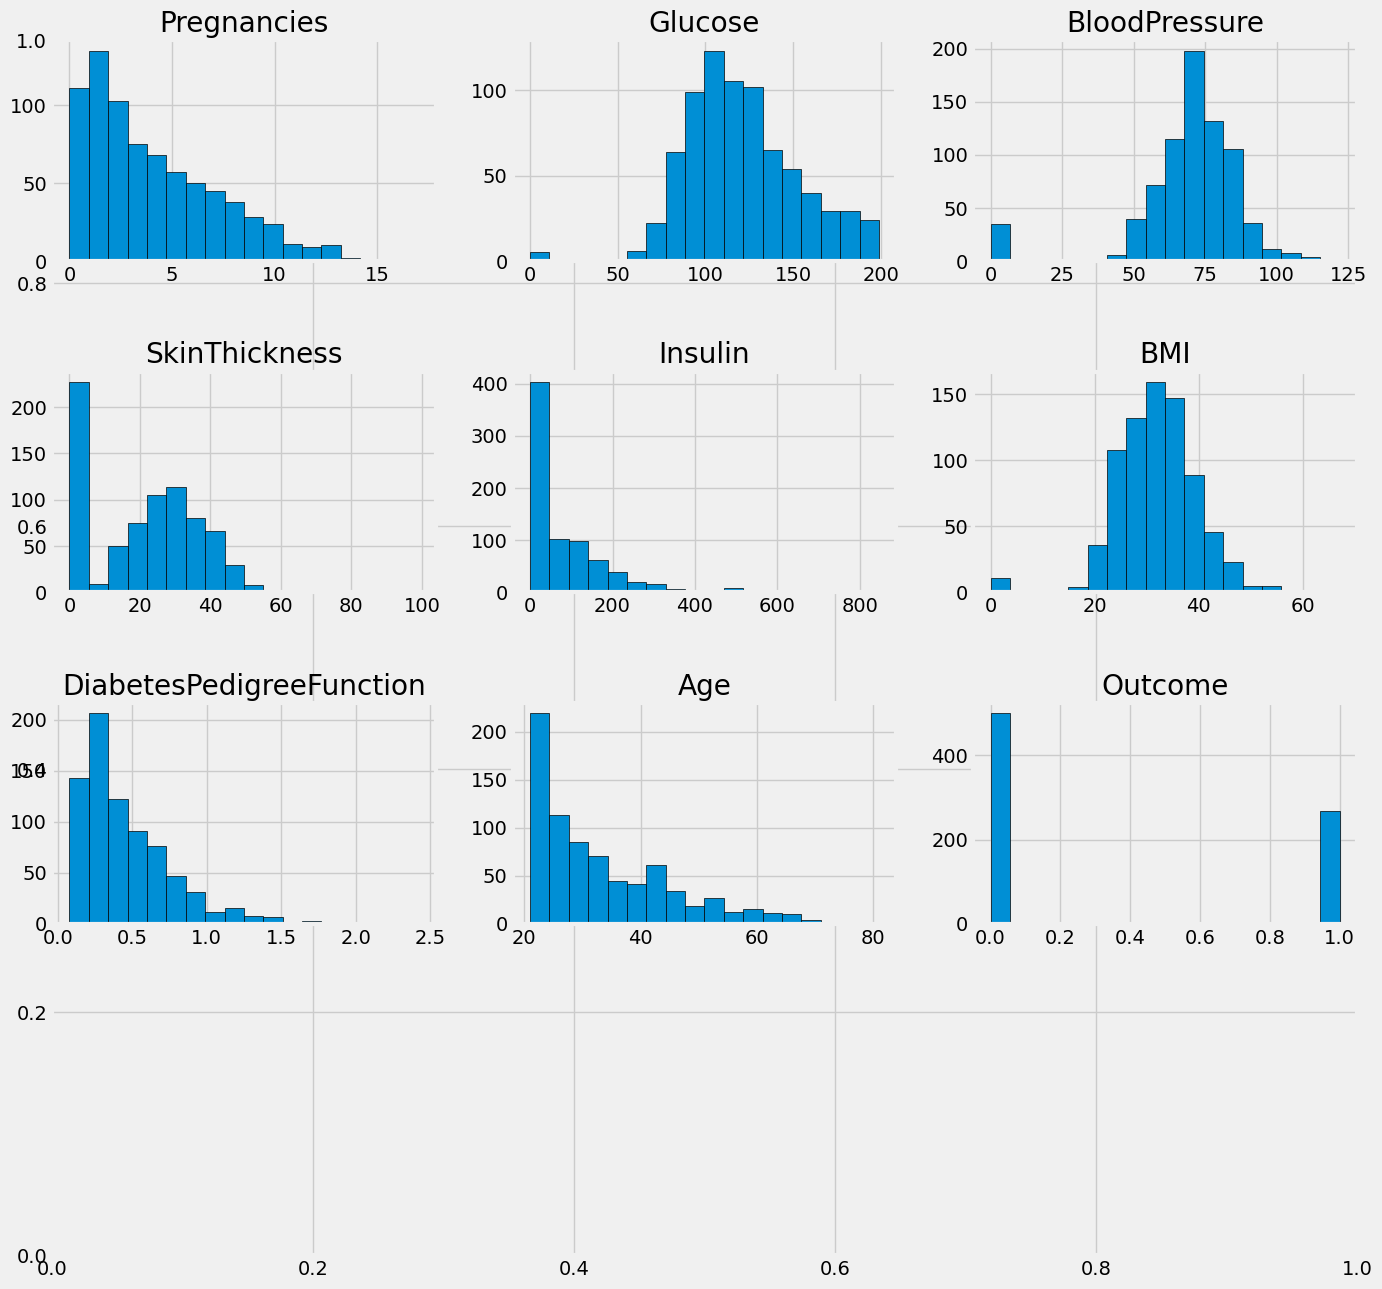

In [130]:
columns=diab.columns[:9]
plt.subplots(figsize=(15,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=18,edgecolor='black')
    plt.title(i)
plt.show()

In [131]:

# Subset van diabetesgevallen maken
diabetes_gevallen = diab[diab['Outcome'] == 1].copy()


# Test 1: Controle op ontbrekende waarden
missing_values_diabetes = diabetes_gevallen.isnull().sum()
print("Ontbrekende waarden in diabetesgevallen:")
print(missing_values_diabetes)

# Test 2: Controle op samenvatting van statistieken
statistics_diabetes = diabetes_gevallen.describe()
print("Samenvatting van statistieken voor diabetesgevallen:")
print(statistics_diabetes)

# Test 3: Controle op duplicaten
duplicates_diabetes = diabetes_gevallen.duplicated().sum()
print("Aantal duplicaten in diabetesgevallen:", duplicates_diabetes)

# Stap 3: Identificeer of sommige kolommen ongeldige waarden bevatten
# Dit kan worden gedaan door de samenvatting van statistieken te analyseren en te kijken naar extreme waarden of onrealistische gegevens.

# Stap 4: Repareer de tabel zodat er geen nulwaarden meer zijn
# Om nulwaarden te vervangen, kunnen we bijvoorbeeld de gemiddelde waarde van de kolom gebruiken.
diabetes_gevallen.fillna(diabetes_gevallen.mean(), inplace=True)




Ontbrekende waarden in diabetesgevallen:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Samenvatting van statistieken voor diabetesgevallen:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  141.257463      70.824627      22.164179  100.335821   
std       3.741239   31.939622      21.491812      17.679711  138.689125   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.750000  119.000000      66.000000       0.000000    0.000000   
50%       4.000000  140.000000      74.000000      27.000000    0.000000   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000

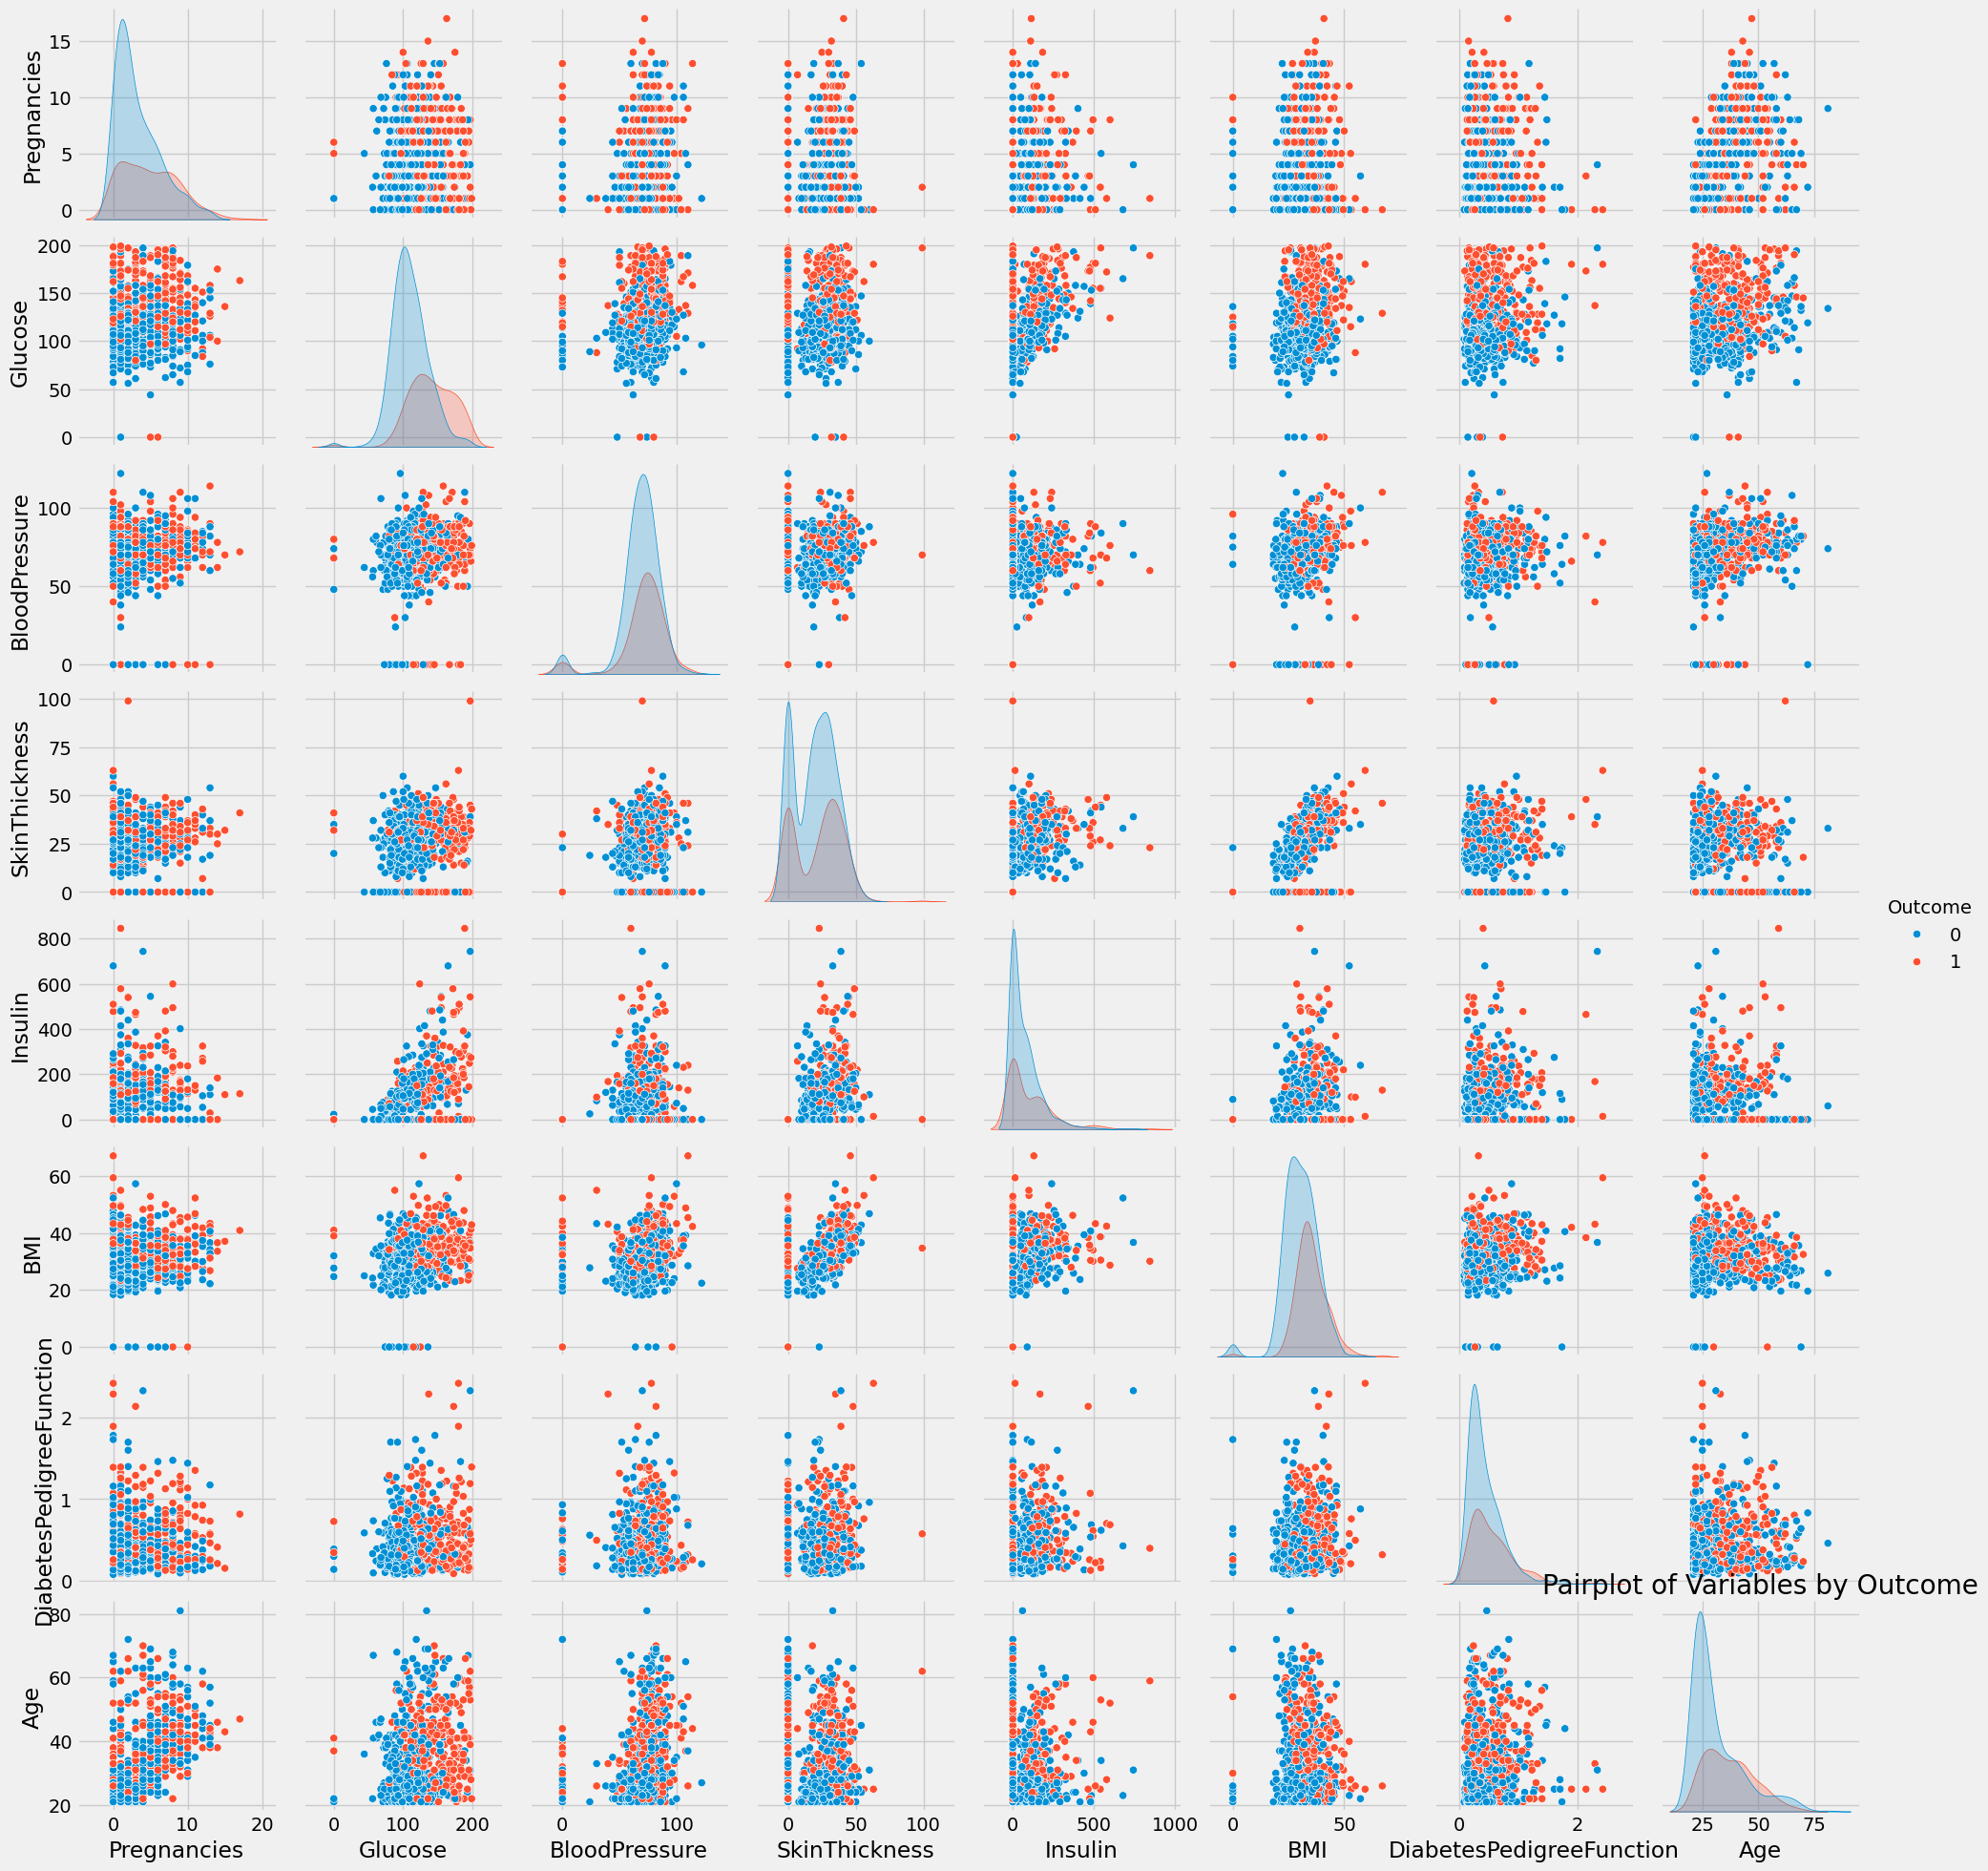

In [132]:
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = [20, 20]

sns.pairplot(diab, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome")

plt.show()

### Opdracht  6 

Hoe bepaal je in pandas de correlatie tussen twee of meerdere kolomen?

Wat betekent het als er sprake is van een correlatie?



In [133]:
correlation = diab['BMI'].corr(diab['Age'])
print("Correlatie tussen BMI en Age:", correlation)

Correlatie tussen BMI en Age: 0.036241870092294126


### Opdracht 7:

Hoe maak je in SNS een heatmap, wat is een heatmap eigenlijk?



Maak een correlatie tabel in pandas en geef die weer in een heatmap

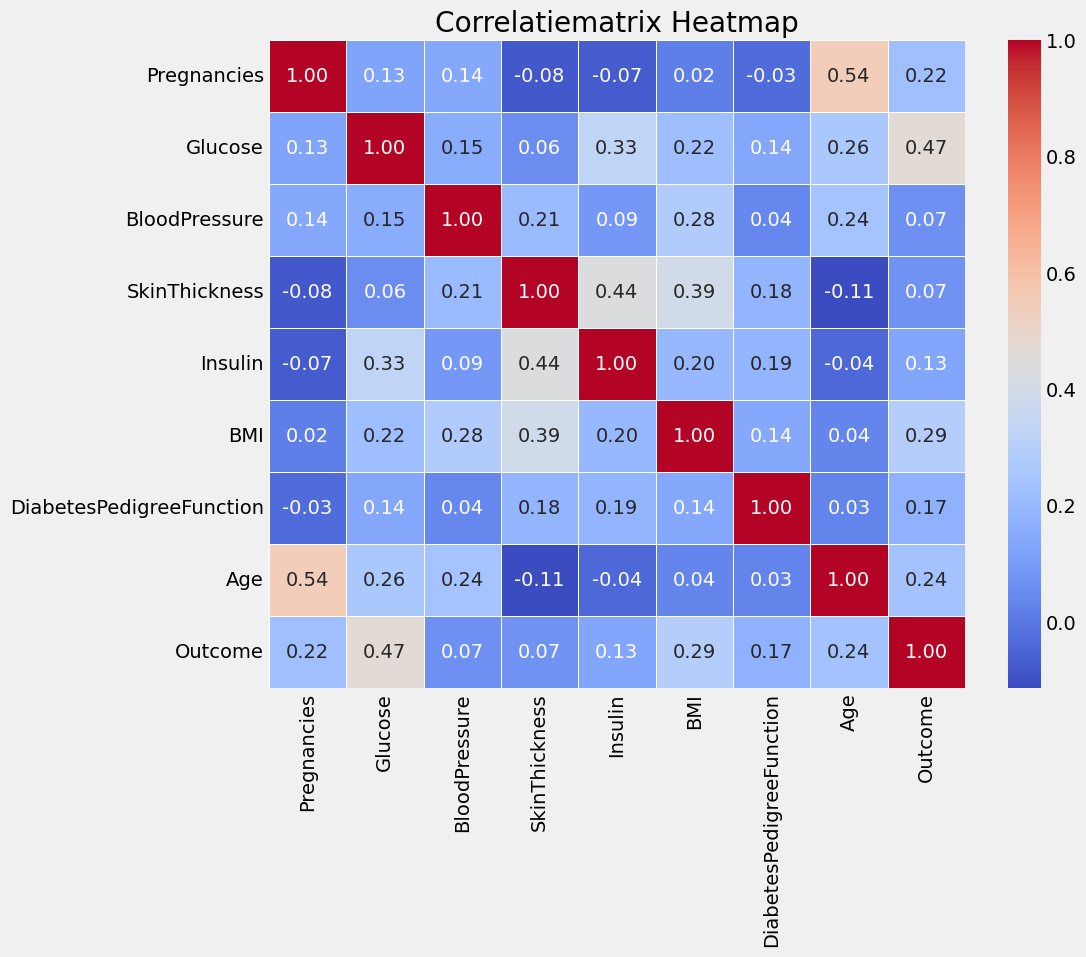

In [134]:
# Heatmap

# Stap 1: Maak een correlatiematrix
correlation_matrix = diab.corr()

# Stap 2: Maak de heatmap met behulp van Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlatiematrix Heatmap')
plt.show()





## Terug naar de les deel 4.

### Laten we eens wat voorspellen!

Gevraagd bekijk van eenieder hier ondergenoemde classifiers (zie de python imports) de wikipedia pagina. 
Welke denk je dat voor ons probleem het meeste geschikt is en waarom?


Wat zijn de verschillen tussen de clasifier?

Om welke reden zou je een bepaalde clasifier kiezen?
.
.
.
.
Zijn er nog meer clasisfiers zoja welke?



Hier zijn enkele veelgebruikte classifiers en hun eigenschappen:

Logistische regressie: Een lineair model dat wordt gebruikt voor classificatieproblemen. Het is eenvoudig, snel en gemakkelijk te interpreteren.

Beslissingsboom: Een boomstructuur waarin elke interne knoop een "test" op een kenmerk uitvoert en elke tak vertegenwoordigt het resultaat van de test. Het is interpreteerbaar en kan met niet-lineaire relaties omgaan.

Random Forest: Een ensemble van beslissingsbomen waarbij de uitvoer van meerdere bomen wordt gecombineerd. Het is robuuster dan een enkele beslissingsboom en kan overfitting verminderen.

Gradient Boosting Machines (GBM): Een ensemble-leermethode waarbij meerdere zwakke leerders (meestal beslissingsbomen) sequentieel worden getraind om de fouten van de vorige leerders te corrigeren. Het is krachtig maar kan gevoelig zijn voor overfitting.

Support Vector Machine (SVM): Een krachtige classifier die goed werkt in zowel lineaire als niet-lineaire gegevensruimten. Het is vooral effectief in situaties met een duidelijke scheiding tussen klassen.

Neurale netwerken: Diepe neurale netwerken hebben de mogelijkheid om complexe patronen in gegevens te leren, maar vereisen vaak veel gegevens en rekenkracht.

In [135]:
# Importeen aantal standaard systeem voor machine-learning gebruik pip om de ontbrekende modules te installeren.

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Opdracht 8:

Zoek uit wat er in het onderstaande blok gebeurt, geef hieronder de beschrijving in je eigen woorden (geen GPT output):

de gegeven code splitst een DataFrame genaamd diab in trainings- en testsets
waarbij de eerste 8 kolommen als functievariabelen worden gebruikt en de kolom Outcome wordt gebruikt als doelvariabele. 
Het doet dit door de dataset te splitsen met behulp van de train_test_split functie van scikit-learn. 
De resulterende trainings- en testsets worden vervolgens toegewezen aan verschillende variabelen voor 
kenmerken en labels om te worden gebruikt bij het trainen en evalueren van machine learning-modellen.


In [136]:
# De code hieronder is absuluut noodzakelijk voor een ML training.
# Er staat wel een regel teveel!, wat kan weg?

outcome=diab['Outcome']
data=diab[diab.columns[:8]]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [137]:
train_X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80,74,11,60,30.0,0.527,22
453,2,119,0,0,0,19.6,0.832,72
706,10,115,0,0,0,0.0,0.261,30
606,1,181,78,42,293,40.0,1.258,22
118,4,97,60,23,0,28.2,0.443,22


In [138]:
train_Y.head(5)

432    0
453    0
706    1
606    1
118    0
Name: Outcome, dtype: int64

### Opdracht 9:

Wat zie je in de output van de bovenstaande cellen? (2 stuks)


Antwoord:De eerste set toont de kenmerken of eigenschappen van verschillende personen 
terwijl de tweede set de bijbehorende labels of doelvariabelen bevat die aangeven of elke persoon diabetes heeft (1) of niet (0).
    
    
    
    
    
    

### SVM 
(Zoek uit wat een SVM model is?) 



Een Support Vector Machine (SVM) is een krachtig supervised learning-model dat wordt gebruikt voor classificatie- en regressietaken. 
Het wordt veel gebruikt in machine learning vanwege zijn vermogen om goed te presteren in complexe domeinen met een duidelijke scheiding tussen klassen.








In [139]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.765625


Accuracy for SVM kernel= linear is 0.7708333333333334


### Logistic 
Regression (Wat is een Logistic Regression model?)


Logistic Regression is een statistisch model dat wordt gebruikt voor classificatietaken 
waarbij de output een binair resultaat is (bijvoorbeeld ja/nee, positief/negatief, 1/0).
 Ondanks de naam bevat Logistic Regression geen regressie, maar het is eerder een classificatie-algoritme.










In [140]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.78125


# Vraag: Welk model van de drie geeft het beste resultaat?


# Vraag: Als je van de drie modelen de confusion matrices naast elkaar zet welke kies je dan als beste? 



In [141]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

model=DecisionTreeClassifier()

# Laad de dataset
iris = load_iris()
X = iris.data
y = iris.target

# Verdeel de dataset in trainings- en testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiseer de Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train het model met behulp van de trainingsdata
dt_classifier.fit(X_train, y_train)

# Voorspel de klassen voor de testset
y_pred = dt_classifier.predict(X_test)

# Bereken de nauwkeurigheid van het model
accuracy = accuracy_score(y_test, y_pred)
print("Nauwkeurigheid van Decision Tree Classifier:", accuracy)




Nauwkeurigheid van Decision Tree Classifier: 1.0


### Alle systemen op een rijtje.


In [142]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.770833
Radial Svm,0.765625
Logistic Regression,0.781250
KNN,0.729167
Decision Tree,0.765625


De bovenstaande algoritmen geven geen erg hoge nauwkeurigheid. Dit kan worden verbeterd door attributeselectie te gebruiken en alleen relevante kolommen te gebruiken. We kunnen ook gebruik maken van ensembling of middeling van verschillende algoritmen. 

## Vraag: Wat is ensembling?

Ensembling is een techniek in machine learning waarbij meerdere individuele modellen worden gecombineerd om een krachtiger en robuuster model te vormen. Het idee achter ensembling is dat de gecombineerde voorspellingen van meerdere zwakke modellen vaak beter zijn dan de voorspellingen van elk afzonderlijk model.



In [145]:
from sklearn.metrics import confusion_matrix

# Veronderstel dat je train_X, train_Y, test_X, test_Y al hebt gedefinieerd

abc = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=3), DecisionTreeClassifier()]

for model in models:
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    # Voeg de voorspelde waarden toe aan de lijst
    abc.append(prediction)



In [ ]:
test_Y.describe()

count    192.000000
mean       0.348958
std        0.477887
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

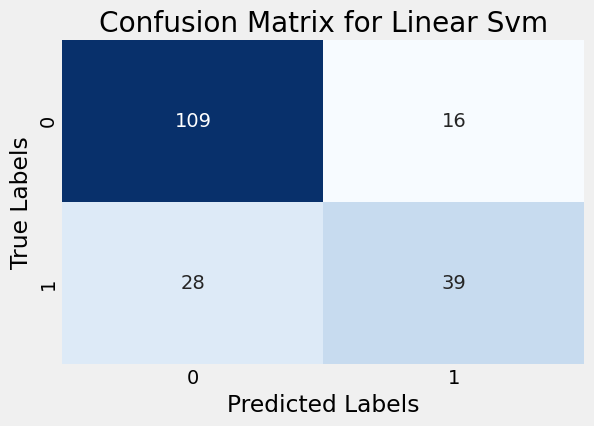

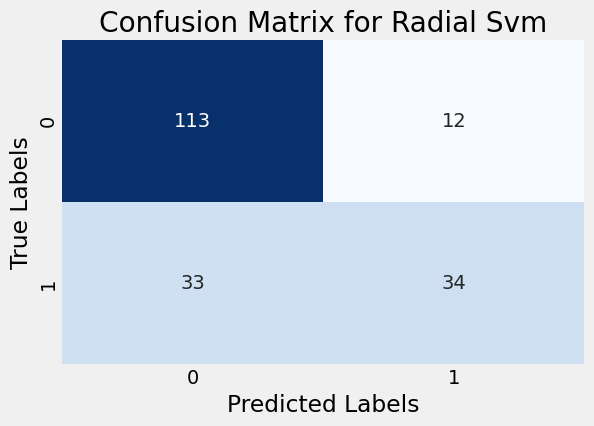

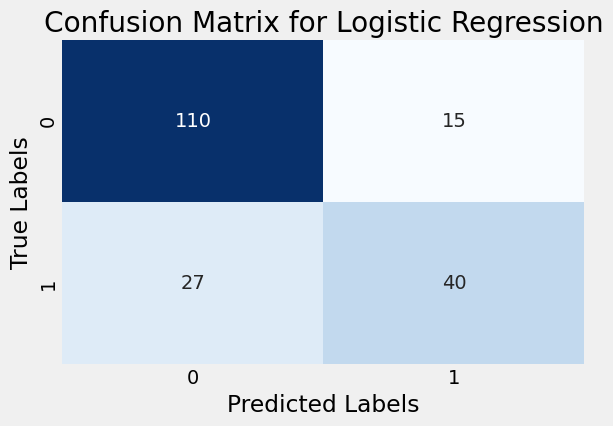

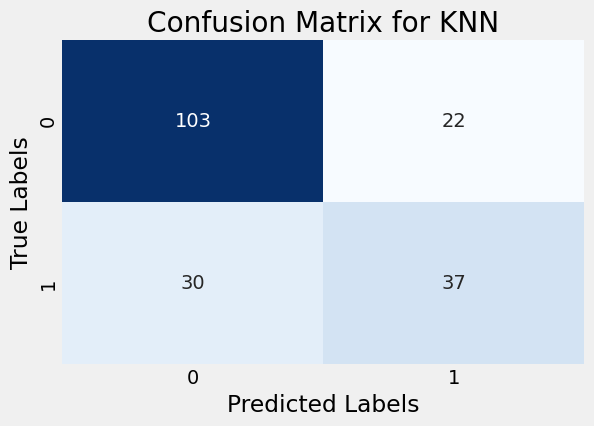

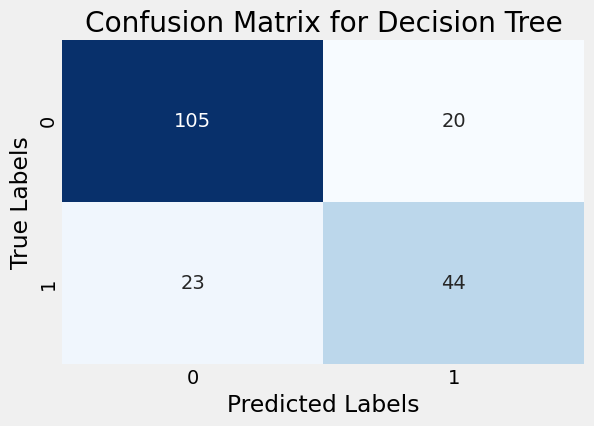

In [147]:
# Itereer over de voorspelde waarden en bereken voor elk model de confusion matrix
for i, pred in enumerate(abc):
    conf_matrix = confusion_matrix(test_Y, pred)
    # Maak een heatmap van de confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for {classifiers[i]}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


## Feature Extraction/ Selection:

- Veel attributen beïnvloeden de nauwkeurigheid van het algoritme.

- Feature extractie betekent dat je alleen de belangrijkste attributen selecteert om de nauwkeurigheid te verbeteren. 

- Selectie van de belangrijkste attributen verkleint de kans op overfitting en versnelt de training.

- Je kan op twee manieren de belangrijkste attributen selecteren:
 - Via de correlatie matrix en dan de attributen met een lage onderlinge correlatie bewaren/schrappen
 - Via een RandomforestClassifier deze geeft het belang van de attributen aan.



In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

### Gevraagd :Observations:

Wat betekenen de verschillende getallen in de velden. Ga nu terug naar je correlatie matrix en kies de 5 attributen met de laagste onderlinge correlatie en vergelijk deze met de top 5 van de RandomForestClassifier?

Skin thickness, bloodpressure, DiabetesPedigreeFunction, insuline, Pregnancies

Verschil:  De waardes in correlatie matrix komen gemiddeld hoger uit dan de waarde van belang in de RandomForestClassifier

Overeenkomst: De laagste waardes in RandomForestClassifier zijn ook de attributen met de laagste onderlinge correlatie.



### Vraag wat zijn volgens jouw de belangrijkste features voor het bepalen van diabetes en geef aan waarop je dat baseert?

Antwoord:
Glucose, BMI en leeftijd.
Ik basseer dit op de waardes uit RandomForestClassifier, omdat deze het grootste belang hebben.


### Tot slot: 
Gezien de resultaten van de voorspellingen zou je een systeem van ML adviseren om disgnose te stellen of iemand diabetes heeft of niet


## Tot slot maak een webapp met je beste model in gradio?
## Als je het notebook download als Python heb je een complete webapp

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)


RandomForestClassifier(random_state=0)

In [157]:
import gradio as gr

# make de interface compleet ..

def predict(Leeftijd, Aantal_zwangerschappen, BMI) :
    
    # zet input data om naar een formaat geschikt voor de predict fucntie
    mydata = {
        'Pregnancies' : [Aantal_zwangerschappen] ,
        'Glucose' : [85] ,
        'BloodPressure' : [72] ,
        'SkinThickness' : [35] ,
        'Insulin' : [0] ,
        'BMI' : [BMI] ,
        'DiabetesPedigreeFunction' : [0.726] ,
        'Age' : [Leeftijd] 
    }
    x = pd.DataFrame(mydata)  

    prediction = model.predict(x)
    
    if prediction[0] == 0:
        result = "Geen diabetes"
    else:
        result = "Diabetes"

    return result

demo = gr.Interface(fn=predict, 
                    inputs=[gr.Slider(21,80,step = 1), gr.Slider(0,80,step = 1), gr.Slider(10,50,)], 
                    outputs=["text"])

demo.launch()
    

Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.
